In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [11]:
# Load the Boston housing dataset
boston_data = pd.read_csv('/content/Boston.csv')

In [12]:
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>],
       [<Axes: title={'center': 'chas'}>,
        <Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'dis'}>, <Axes: title={'center': 'rad'}>,
        <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>],
       [<Axes: title={'center': 'black'}>,
        <Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >]], dtype=object)

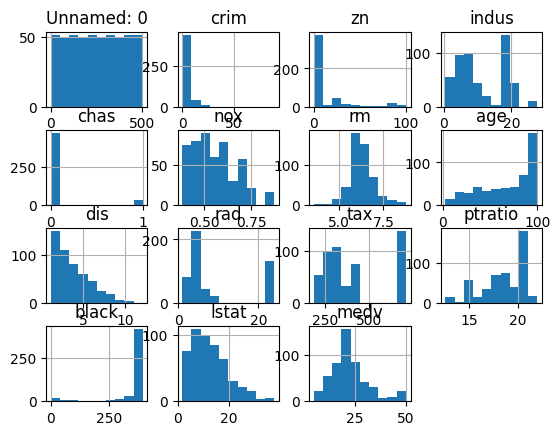

In [13]:
# Perform exploratory data analysis
boston_data.describe()
boston_data.hist()

In [14]:
# Identify the features and target variable
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
target = 'medv'

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston_data[features], boston_data[target], test_size=0.2)

In [16]:
# Create a neural network model with one hidden layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 42733.6250
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 32812.7500
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 24750.2031
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 18300.0176
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 13396.8486
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 9469.0322
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 6588.4331
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 4440.9331
Epoch 9/200
13/13 [==============================] - 0s 3ms/step - loss: 2935.4028
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 1910.1981
Epoch 11/200
13/13 [==============================] - 0s 2ms/step - loss: 1252.5996
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 852.89

In [19]:
# Evaluate the model on the testing set
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 75.3583


75.35832977294922

In [20]:
# Make predictions on new data
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [21]:
# Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

MSE: 75.35832668584602
RMSE: 8.680917387341388
MAE: 6.801660380702393
R2 Score: 0.21940587297869618


In [22]:
for i in range(10):
    print('Prediction:', predictions[i][0], 'Actual:', y_test.iloc[i])

Prediction: 6.6779375 Actual: 15.0
Prediction: 30.6017 Actual: 28.2
Prediction: 31.633215 Actual: 32.2
Prediction: 19.404757 Actual: 13.0
Prediction: 21.913893 Actual: 16.7
Prediction: 18.042404 Actual: 21.2
Prediction: 27.47226 Actual: 27.1
Prediction: 21.232557 Actual: 25.0
Prediction: 0.037015036 Actual: 8.4
Prediction: 23.959698 Actual: 15.0
